# The sparks foundation
# Graduate Rotational Internship Program (GRIP)
# Data Science &Business Analytics Internship
# Harshal Shivaji Holam

Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

Import dataset from given URL

In [2]:
data = 'http://bit.ly/w-data'
df = pd.read_csv(data)
df.head()        #first 5 rows with all the columns

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# EDA

In [3]:
df.shape

(25, 2)

here we have 25 rows and 2 columns

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [6]:
df.tail()        #last 5 rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


check the null values if any

In [7]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

here no null value is present in both columns

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


here we get all statistical terms data

In [9]:
df.corr()   #correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


here we can see that there is positive correlation between score and hours. and the value of correlation is 0.976191

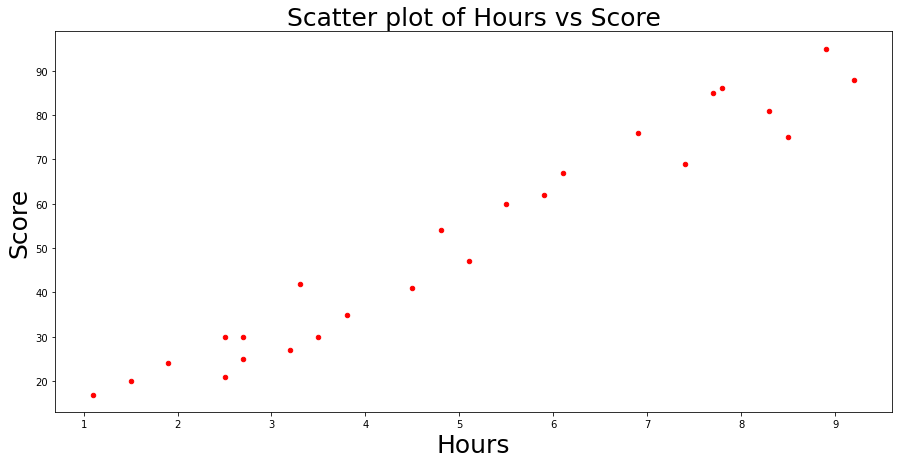

In [10]:
#Scatter plot
df.plot(kind='scatter',x='Hours',y='Scores',figsize=(15,7),color='r')
plt.title("Scatter plot of Hours vs Score",fontsize=25)
plt.xlabel("Hours",fontsize=25)
plt.ylabel("Score",fontsize=25)
plt.show()

from above scatter plot we can see that there is positive linear relationship between score and hours

Now divide the data into input (Attribute) and output(labels)

In [11]:
x=df.iloc[:,:-1].values         #Hours
y=df.iloc[:,1].values          #Score

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print("training is completed")

training is completed


# Plotting regression line with data point

In [14]:
print("model intercept : ",lr.intercept_)

model intercept :  -1.5369573315500702


In [19]:
print("model coefficient: ",lr.coef_)

model coefficient:  [10.46110829]


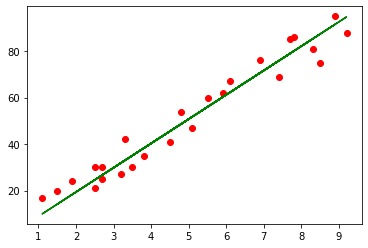

In [15]:
m=lr.coef_         #plotting regression line
c=lr.intercept_
y_line=m*x+c

plt.scatter(x,y,c='r')
plt.plot(x,y_line,c='g')
plt.show()

In [16]:
print(x_test)
prediction = lr.predict(x_test)


[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [17]:
h=[9.25]
s=lr.predict([h])

In [18]:
#accuracy of model
lr.score(x_test,y_test)

0.8421031525243527

Accuracy of model is 84%

In [20]:
table = pd.DataFrame({'Actual':y_test,'Predicted':prediction})
table

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


# What would be the predicted score if a students studies for 9.25 hours/day ?

In [22]:
h= 9.25
print("No of hours study: ",h)
s=lr.predict([[h]])
print("score is: ",s)

No of hours study:  9.25
score is:  [95.22829438]


# Model evaluation

In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error
print("r^2 value is given by",metrics.r2_score(y_test,prediction))
print("mean absolute error",metrics.mean_absolute_error(y_test,prediction))

r^2 value is given by 0.8421031525243527
mean absolute error 7.882398086270432
